<a href="https://colab.research.google.com/github/shailendrasingh98/IITG-AIML/blob/main/TransferLearning_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import cv2
import PIL.Image as Image

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
#image_count = len(list(data_dir.glob('*/*.jpg')))
#print(image_count)

image_count = len(list(data_dir.glob('flower_photos/*/*.jpg')))
print(image_count)

3670


# Let's explore the images in this dataset

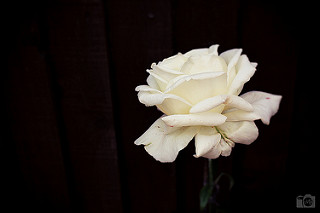

In [4]:
#roses = list(data_dir.glob('roses/*'))
#Image.open(str(roses[10]))

roses = list(data_dir.glob('flower_photos/roses/*'))
Image.open(str(roses[10]))

In [5]:
roses[:5]

[PosixPath('/root/.keras/datasets/flower_photos/flower_photos/roses/4279989256_9a48c0d194_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/flower_photos/roses/3500121696_5b6a69effb_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/flower_photos/roses/3654988152_b11178bbcb.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/flower_photos/roses/5578760521_e54aca6bed_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/flower_photos/roses/7251352826_69b62cba2c_m.jpg')]

In [6]:
type(Image.open(str(roses[10])))

PIL.JpegImagePlugin.JpegImageFile

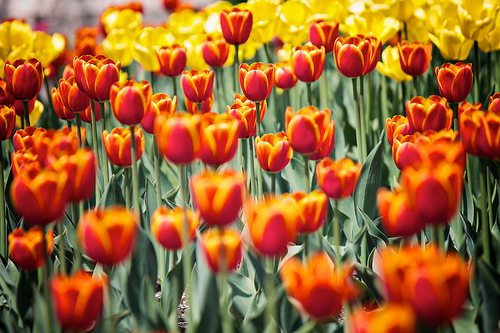

In [7]:
#tulips = list(data_dir.glob('tulips/*'))
#Image.open(str(tulips[0]))

tulips = list(data_dir.glob('flower_photos/tulips/*'))
Image.open(str(tulips[0]))

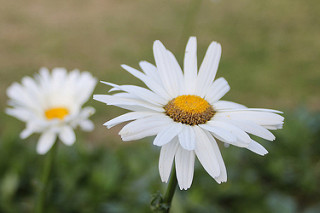

In [8]:
#daisy = list(data_dir.glob('daisy/*'))
#Image.open(str(daisy[0]))

daisy = list(data_dir.glob('flower_photos/daisy/*'))
Image.open(str(daisy[4]))

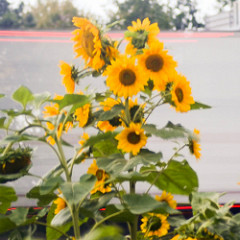

In [9]:
#sunflower = list(data_dir.glob('sunflowers/*'))
#Image.open(str(sunflower[0]))

sunflowers = list(data_dir.glob('flower_photos/sunflowers/*'))
Image.open(str(sunflowers[40]))


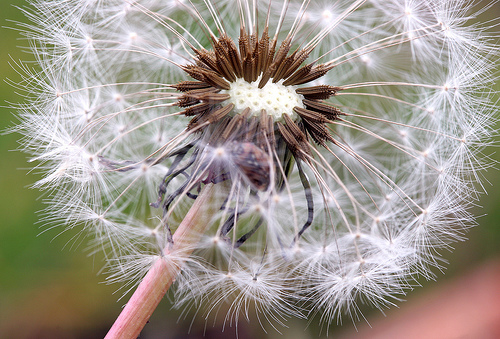

In [10]:
#dandelion = list(data_dir.glob('dandelion/*'))
#Image.open(str(dandelion[12]))

dandelions = list(data_dir.glob('flower_photos/dandelion/*'))
Image.open(str(dandelions[4]))

array([[[ 8, 48, 20],
        [ 9, 49, 21],
        [10, 50, 22],
        ...,
        [14, 72, 43],
        [13, 71, 42],
        [12, 70, 41]],

       [[ 9, 49, 21],
        [10, 50, 22],
        [11, 51, 23],
        ...,
        [14, 72, 43],
        [13, 71, 42],
        [13, 71, 42]],

       [[10, 50, 22],
        [10, 50, 22],
        [10, 51, 23],
        ...,
        [14, 72, 43],
        [14, 72, 43],
        [13, 71, 42]],

       ...,

       [[29, 73, 50],
        [26, 70, 47],
        [25, 70, 44],
        ...,
        [ 3, 67, 31],
        [ 4, 68, 32],
        [ 4, 68, 32]],

       [[32, 74, 51],
        [29, 71, 48],
        [27, 69, 44],
        ...,
        [ 3, 67, 31],
        [ 4, 68, 32],
        [ 5, 69, 33]],

       [[35, 74, 53],
        [32, 71, 49],
        [28, 70, 45],
        ...,
        [ 3, 67, 31],
        [ 5, 69, 33],
        [ 6, 70, 34]]], dtype=uint8)
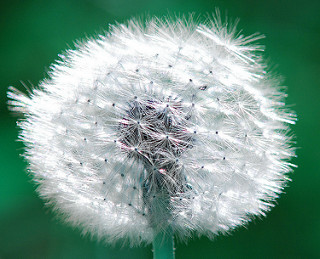

In [11]:
cv2.imread(str(dandelions[12]))

In [12]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

flowers_images_dict = {
    'roses': list(data_dir.glob('flower_photos/roses/*')),
    'daisy': list(data_dir.glob('flower_photos/daisy/*')),
    'dandelion': list(data_dir.glob('flower_photos/dandelion/*')),
    'sunflowers': list(data_dir.glob('flower_photos/sunflowers/*')),
    'tulips': list(data_dir.glob('flower_photos/tulips/*')),
}

In [13]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

# Let's check shape of the input image

In [14]:
img1 = cv2.imread(str(flowers_images_dict['roses'][0]))
img1.shape

(240, 320, 3)

In [15]:
img2 = cv2.imread(str(flowers_images_dict['dandelion'][0]))
img2.shape

(341, 500, 3)

In [16]:
img3 = cv2.imread(str(flowers_images_dict['sunflowers'][0]))
img3.shape

(213, 320, 3)

In [17]:
cv2.resize(img1,(299,299)).shape

(299, 299, 3)

In [18]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(299,299))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [19]:
import numpy as np

X = np.array(X)
y = np.array(y)

In [20]:
#splitting input data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [21]:
#normalising/ standardising the input numerical pixel dataset to scale the values between 0 and 1

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [22]:
X[0].shape

(299, 299, 3)

In [23]:
type(X[0])

numpy.ndarray

In [24]:
X_train_scaled[0].shape

(299, 299, 3)

# Transfer learning using inception v3

In [25]:
feature_extractor_model = "https://tfhub.dev/google/imagenet/inception_v3/classification/5"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(299, 299, 3), trainable=False)

In [26]:
import tf_keras
num_of_flowers = 5

#model = tf.keras.Sequential([
#  pretrained_model_without_top_layer,
#  tf.keras.layers.Dense(num_of_flowers)
#])

#model.summary()

model = tf_keras.Sequential([
    pretrained_model_without_top_layer,
   tf_keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              23853833  
                                                                 
 dense (Dense)               (None, 5)                 5010      
                                                                 
Total params: 23858843 (91.01 MB)
Trainable params: 5010 (19.57 KB)
Non-trainable params: 23853833 (91.00 MB)
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

In [ ]:
model.evaluate(X_test_scaled,y_test)


In [ ]:
predictions = model.predict(np.array([X[0],X[11],X[12]]))
predictions

In [ ]:
predictions_out = np.argmax(predictions,axis=1)
predictions_out

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[0])
plt.show()

print(y[0])

In [ ]:
plt.imshow(X[11])
plt.show()

print(y[11])

In [ ]:
plt.imshow(X[12])
plt.show()

print(y[12])